<a href="https://colab.research.google.com/github/rondinell/Intelig-ncia-Artificial/blob/main/Outromodelo10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Célula 1: Instalação das bibliotecas necessárias
!pip install pandas requests pytrends
print("Bibliotecas instaladas com sucesso!")

Bibliotecas instaladas com sucesso!


In [2]:
# Célula 2: Personalize sua busca aqui

# 1. Defina as cidades que você quer analisar. Escreva o nome exato.
cidades_analise = ["Jundiaí", "Campinas", "Sorocaba", "Vinhedo", "Louveira"]

# 2. Defina o estado (sigla) para refinar a busca dos códigos das cidades.
estado_sigla = "SP"

# 3. Termo que descreve seu negócio (para buscas em mapas e imóveis).
termo_negocio = "clínica de pilates"

# 4. Termo de busca principal para o Google Trends (use o termo mais popular).
termo_busca_google = "pilates"

print(f"Análise configurada para o negócio '{termo_negocio}' nas cidades: {', '.join(cidades_analise)}")

Análise configurada para o negócio 'clínica de pilates' nas cidades: Jundiaí, Campinas, Sorocaba, Vinhedo, Louveira


In [4]:
# Célula 3: Coleta de Dados Demográficos e Econômicos via API do IBGE
import requests
import pandas as pd

print("Buscando dados no IBGE... Isso pode levar um minuto.")

# DataFrame para armazenar os resultados
dados_finais_ibge = []

# 1. Buscar o código (ID) de todos os municípios do estado definido
url_municipios = f"https://servicodados.ibge.gov.br/api/v1/localidades/estados/{estado_sigla}/municipios"
try:
    municipios_sp = requests.get(url_municipios).json()
    mapa_cidades_id = {mun['nome']: mun['id'] for mun in municipios_sp}

    # 2. Loop para cada cidade da nossa lista
    for cidade in cidades_analise:
        if cidade in mapa_cidades_id:
            cidade_id = mapa_cidades_id[cidade]

            # 3. Buscar PIB per capita (Agregado 5938, Variável 37)
            url_pib = f"https://servicodados.ibge.gov.br/api/v3/agregados/5938/periodos/-1/variaveis/37?localidades=N6[{cidade_id}]"
            pib_data = requests.get(url_pib).json()
            pib_valor = float(pib_data[0]['resultados'][0]['series'][0]['serie']['2021'])

            # 4. Buscar População Estimada (Agregado 6579, Variável 9324)
            url_pop = f"https://servicodados.ibge.gov.br/api/v3/agregados/6579/periodos/-1/variaveis/9324?localidades=N6[{cidade_id}]"
            pop_data = requests.get(url_pop).json()
            pop_valor = int(pop_data[0]['resultados'][0]['series'][0]['serie']['2021'])

            # 5. Adicionar aos resultados
            dados_finais_ibge.append({
                "Cidade": cidade,
                "População Estimada (2021)": pop_valor,
                "PIB per Capita (R$) (2021)": pib_valor
            })
        else:
            print(f"AVISO: Cidade '{cidade}' não encontrada na base do IBGE para o estado '{estado_sigla}'.")

    # 6. Criar e exibir a tabela
    tabela_ibge = pd.DataFrame(dados_finais_ibge)
    tabela_ibge = tabela_ibge.sort_values(by="PIB per Capita (R$)", ascending=False)

    print("\n--- Tabela Comparativa (IBGE) ---")
    display(tabela_ibge.style.format({
        'População Estimada (2021)': '{:,.0f}'.format,
        'PIB per Capita (R$) (2021)': 'R$ {:,.2f}'.format
    }))

except Exception as e:
    print(f"Ocorreu um erro ao buscar os dados do IBGE: {e}")

Buscando dados no IBGE... Isso pode levar um minuto.
Ocorreu um erro ao buscar os dados do IBGE: '2021'



--- Análise de Interesse de Busca (Google Trends) ---


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


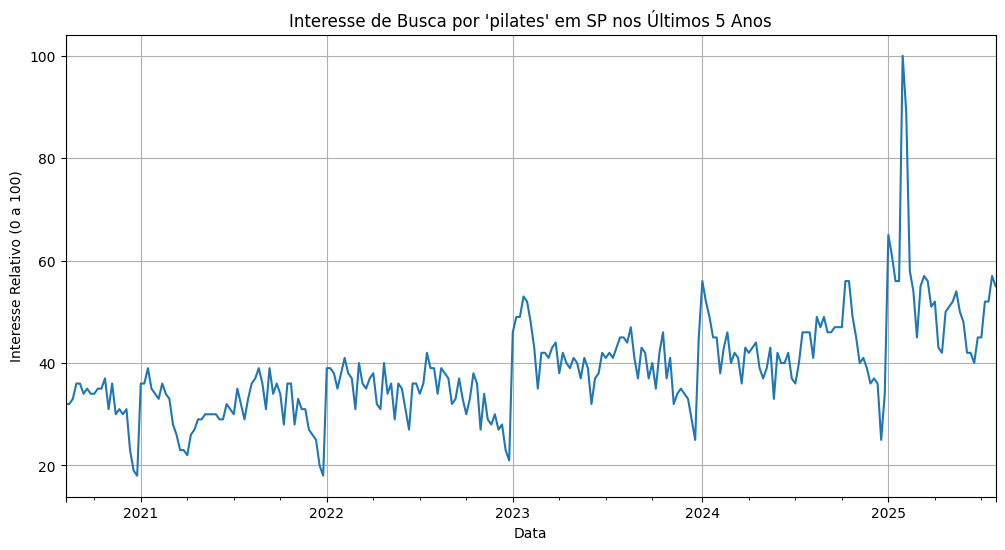

In [5]:
# Célula 4: Análise de Demanda com Google Trends
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

print("\n--- Análise de Interesse de Busca (Google Trends) ---")

try:
    pytrends = TrendReq(hl='pt-BR', tz=360) # 360 = UTC-3 (Horário de Brasília)

    # O Google Trends é mais eficaz para comparar termos ou ver a tendência em uma região grande (como o estado).
    # Vamos buscar o interesse no estado de São Paulo ao longo do tempo.
    pytrends.build_payload(kw_list=[termo_busca_google], geo=f'BR-{estado_sigla}', timeframe='today 5-y')

    # Obter os dados de interesse ao longo do tempo
    df_trends = pytrends.interest_over_time()

    if not df_trends.empty:
        # Plotar o gráfico
        plt.figure(figsize=(12, 6))
        df_trends[termo_busca_google].plot()
        plt.title(f"Interesse de Busca por '{termo_busca_google}' em {estado_sigla} nos Últimos 5 Anos")
        plt.xlabel("Data")
        plt.ylabel("Interesse Relativo (0 a 100)")
        plt.grid(True)
        plt.show()
    else:
        print("Não foram encontrados dados suficientes no Google Trends para o termo e região selecionados.")

except Exception as e:
    print(f"Ocorreu um erro ao conectar com o Google Trends: {e}")

In [6]:
# Célula 5: Geração de Links para Pesquisa Manual
from urllib.parse import quote_plus

print("\n--- Links Rápidos para Análise Manual ---")
print("Clique nos links abaixo para abrir a pesquisa em uma nova aba.")

for cidade in cidades_analise:
    print(f"\n--- {cidade} ---")

    # Google Maps (Concorrência)
    termo_maps = quote_plus(f"{termo_negocio} em {cidade}, {estado_sigla}")
    link_maps = f"https://www.google.com/maps/search/?api=1&query={termo_maps}"
    print(f"Concorrência (Google Maps): {link_maps}")

    # Zap Imóveis (Custo de Aluguel Comercial)
    termo_zap = quote_plus(f"{cidade} {estado_sigla}").lower()
    link_zap = f"https://www.zapimoveis.com.br/aluguel/loja-salao-ponto-comercial/{termo_zap}/"
    print(f"Custo de Aluguel (Zap Imóveis): {link_zap}")

    # OLX (Custo de Aluguel Comercial)
    termo_olx = quote_plus(cidade).lower()
    ddd = "" # Se você souber os DDDs, pode melhorar a busca
    link_olx = f"https://www.olx.com.br/imoveis/aluguel/estado-sp?q=ponto%20comercial%20{termo_olx}"
    print(f"Custo de Aluguel (OLX): {link_olx}")


--- Links Rápidos para Análise Manual ---
Clique nos links abaixo para abrir a pesquisa em uma nova aba.

--- Jundiaí ---
Concorrência (Google Maps): https://www.google.com/maps/search/?api=1&query=cl%C3%ADnica+de+pilates+em+Jundia%C3%AD%2C+SP
Custo de Aluguel (Zap Imóveis): https://www.zapimoveis.com.br/aluguel/loja-salao-ponto-comercial/jundia%c3%ad+sp/
Custo de Aluguel (OLX): https://www.olx.com.br/imoveis/aluguel/estado-sp?q=ponto%20comercial%20jundia%c3%ad

--- Campinas ---
Concorrência (Google Maps): https://www.google.com/maps/search/?api=1&query=cl%C3%ADnica+de+pilates+em+Campinas%2C+SP
Custo de Aluguel (Zap Imóveis): https://www.zapimoveis.com.br/aluguel/loja-salao-ponto-comercial/campinas+sp/
Custo de Aluguel (OLX): https://www.olx.com.br/imoveis/aluguel/estado-sp?q=ponto%20comercial%20campinas

--- Sorocaba ---
Concorrência (Google Maps): https://www.google.com/maps/search/?api=1&query=cl%C3%ADnica+de+pilates+em+Sorocaba%2C+SP
Custo de Aluguel (Zap Imóveis): https://www.zap